In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

from math import sqrt
from scipy import stats
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from datetime import datetime, timedelta
import requests
import os
import wrangle as w

# Don't bother with warning me...
import warnings
warnings.filterwarnings("ignore")
# See everything
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
# Set default seaborn style
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')

In [ ]:
|Column             |Non-Null Count                  |Data Type   |               
|-------------------|--------------------------------|------------|           
|GameDate           | Date game was played           |object      |                
|Quarter            | Quarter the play happened      |int64       |                
|Minute             | Minute the play happened       |int64       |                
|Second             | Second the play happened       |int64       |              
|OffenseTeam        | Team playing offense           |object      |           
|DefenseTeam        | Team playing defense           |object      |           
|Down               | What down the play occured on  |int64       |           
|ToGo               | Yards until a 1st down         |int64       |           
|YardLine           | Yards needed to score a touchdown  |int64       |           
|SeriesFirstDown    | Whether play is first of drive |int64       |           
|SeasonYear         | Season that play occured       |int64       |           
|Yards              | How many yards gain on play    |int64       |           
|Formation          | Formation of offense           |object      |           
|PlayType           | Type of play performed         |object      |           
|IsPass             | Was the play a pass            |int64       |           
|IsInterception     | Was the play an interception   |int64       |           
|IsFumble           | Was the play a fumble          |int64       |           
|YardLineFixed      | Yardline the play started on   |int64       |           
|YardLineDirection  | Side of field play started     |object      |           
|YTG_bins           | Yards to go bins used          |category    |           
|QuarterSeconds     | Maximum seconds up to current quarter  |int64       |           
|ClockSeconds       | Total seconds on the game clock |int64       |           
|SecondsLeft        | Total seconds left in the game |int64       |           
          

## Acquire the Data

In [2]:
# csv_files = os.listdir('plays_file')
# dataframes = []

# # read in each file with pandas
# for file in csv_files:
#     if not file.endswith('.csv'):
#         continue
#     print('reading', file)
#     df = pd.read_csv('plays_file/'+file)
#     df['file'] = file
#     dataframes.append(df)

# # combine them all together
# plays = pd.concat(dataframes)

In [3]:
df = w.acquire_play_by_play()

plays-2019.csv acquired
plays-2018.csv acquired
plays-2020.csv acquired
plays-2021.csv acquired
plays-2017.csv acquired


In [4]:
df.shape

(221479, 46)

## Prepare the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221479 entries, 0 to 45292
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          221479 non-null  int64  
 1   GameDate                        221479 non-null  object 
 2   Quarter                         221479 non-null  int64  
 3   Minute                          221479 non-null  int64  
 4   Second                          221479 non-null  int64  
 5   OffenseTeam                     203954 non-null  object 
 6   DefenseTeam                     213836 non-null  object 
 7   Down                            221479 non-null  int64  
 8   ToGo                            221479 non-null  int64  
 9   YardLine                        221479 non-null  int64  
 10  Unnamed: 10                     0 non-null       float64
 11  SeriesFirstDown                 221479 non-null  int64  
 12  Unnamed: 12      

In [6]:
# # Identify drop columns that are believe to be of no use.
# drop_cols = ['GameId','Unnamed: 10','Unnamed: 12', 'TeamWin','Unnamed: 16', 'Unnamed: 17', 
#        'IsIncomplete', 'IsTouchdown','PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
#        'Challenger', 'IsMeasurement','IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
#        'RushDirection','IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType','PenaltyYards', 'file']

In [7]:
# # Drop columns identified as not needed
# df = plays.drop(columns=drop_cols)# Drop rows for kick formations


In [8]:
# Drop rows for kick formations
# df = df[~df.filter(like='Formation').apply(set, axis = 1).eq({'PUNT', 'FIELD GOAL'})]
# df = df[df['Formation'].str.contains('PUNT') == False]


In [9]:
# # Drop rows for kick formations
# df = df[df.Formation != 'PUNT']
# df = df[df.Formation != 'FIELD GOAL']
# # Drop rows where play type was not pass or rush
# df = df[df.PlayType != 'KICK OFF']
# df = df[df.PlayType != 'TIMEOUT']
# df = df[df.PlayType != 'SACK']
# df = df[df.PlayType != 'EXTRA POINT']
# df = df[df.PlayType != 'SCRAMBLE']
# df = df[df.PlayType != 'NO PLAY']
# df = df[df.PlayType != 'QB KNEEL']
# df = df[df.PlayType != 'TWO-POINT CONVERSION']
# df = df[df.PlayType != 'EXCEPTION']
# df = df[df.PlayType != 'FUMBLES']
# df = df[df.PlayType != 'PUNT']
# df = df[df.PlayType != 'CLOCK STOP']
# df = df[df.PlayType != 'PENALTY']
# df = df[df.PlayType != 'FIELD GOAL']


In [10]:
# df['GameDate'] = pd.to_datetime(df['GameDate'])
# df.set_index('GameDate', inplace=True)


In [11]:
# # # Concat minutes and seconds into time with ':'
# df['ClockTime'] = (pd.to_datetime(df['Minute'].astype(str) 
#                     + ':' 
#                     + df['Second'].astype(str), format='%M:%S'))
# # Change Quarter into Quarter-Minutes (1=15, 2=30, 3=45, 4=60)
# quarterlength = timedelta(minutes=15)
# df['QMins'] = (pd.to_datetime(df.Quarter * quarterlength))

# # Full game time minutes
# fullgametime = timedelta(minutes=60)
# # Calculate Quarter - Clock Time - 60(Total Game Time)
# df['TimeLeft'] = df.QMins - df.ClockTime - fullgametime
# df['QuarterSeconds'] = ((df.Quarter*15)*60)
# df['ClockSeconds'] = ((df.Minute * 60)+ df.Second)
# df['SecondsLeft'] = abs(df.QuarterSeconds - df.ClockSeconds - 3600)


In [12]:
df = w.prep_play_by_play(df)


In [13]:
df.head(2)

,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,SeasonYear,Yards,Formation,PlayType,IsPass,IsInterception,IsFumble,YardLineFixed,YardLineDirection,YTG_bins,QuarterSeconds,ClockSeconds,SecondsLeft
0,2019-12-22,4,1,40,LAC,LV,3,9,91,0,2019,0,SHOTGUN,PASS,1,0,0,9,OPP,medium,3600,100,100
1,2019-12-22,4,1,47,LAC,LV,2,9,91,0,2019,0,SHOTGUN,PASS,1,0,0,9,OPP,medium,3600,107,107


## Split data:

In [14]:
train, validate, test = w.split_data(df)

Data frame sizes are as follow: 
Train = 84788 
Validate = 36338 
Test = 30282 
Total dataframe = 151408


In [15]:
train.groupby('OffenseTeam').Formation.value_counts(ascending = False)

OffenseTeam  Formation        
ARI          SHOTGUN              1354
             UNDER CENTER          653
             NO HUDDLE SHOTGUN     579
             NO HUDDLE              35
ATL          UNDER CENTER         1289
             SHOTGUN              1205
             NO HUDDLE SHOTGUN     155
             NO HUDDLE             104
BAL          SHOTGUN              2067
             UNDER CENTER          469
             NO HUDDLE SHOTGUN     123
             NO HUDDLE               9
             WILDCAT                 1
BUF          SHOTGUN              1461
             UNDER CENTER          957
             NO HUDDLE SHOTGUN     207
             NO HUDDLE              49
CAR          SHOTGUN              1615
             UNDER CENTER          792
             NO HUDDLE SHOTGUN     182
             NO HUDDLE              36
CHI          SHOTGUN              1565
             UNDER CENTER          795
             NO HUDDLE SHOTGUN     197
             NO HUDDLE           

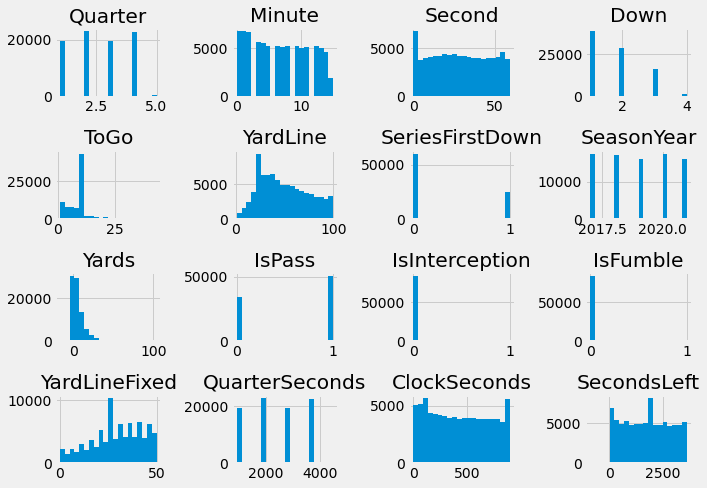

In [16]:
train.hist(bins = 20)
plt.tight_layout()
    

Text(0.5, 1.0, 'Rankings of Correlation to Yards')

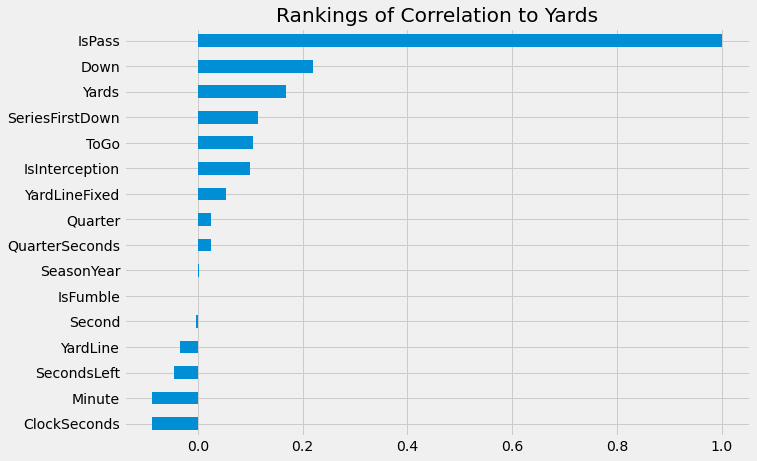

In [17]:
df.corr()['IsPass'].sort_values().plot(kind='barh')
plt.title('Correlation of Features to IsPass')

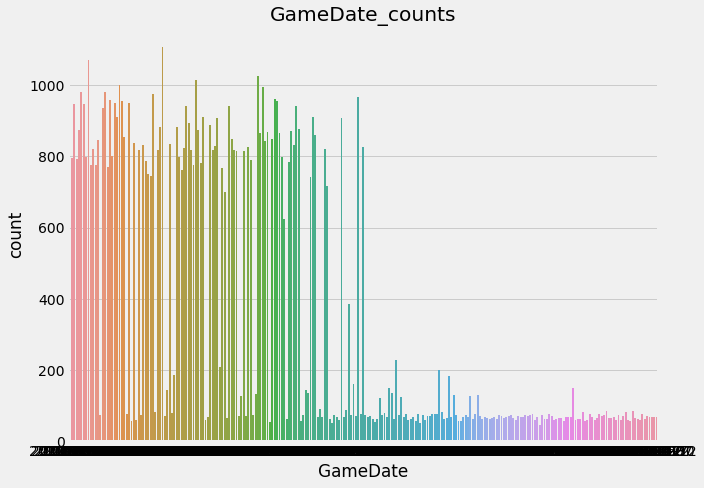

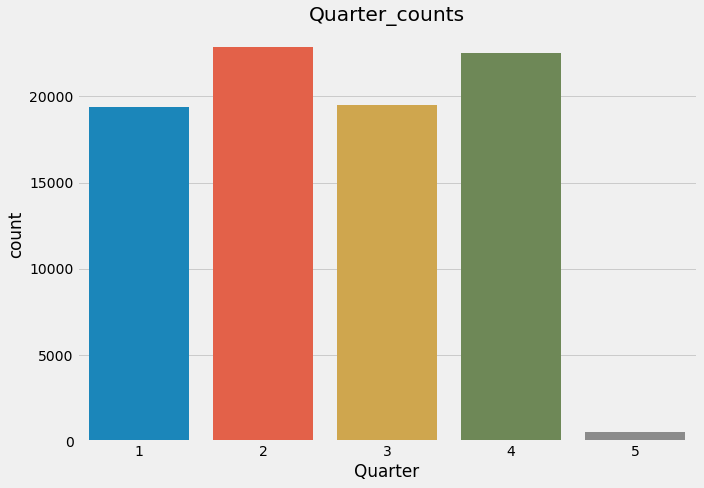

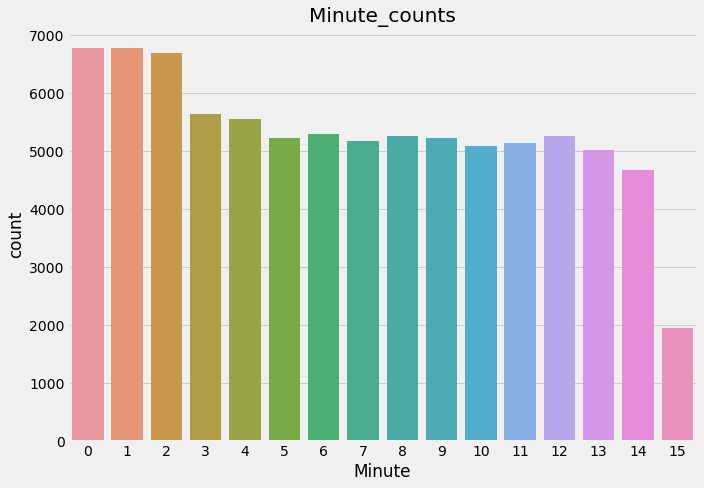

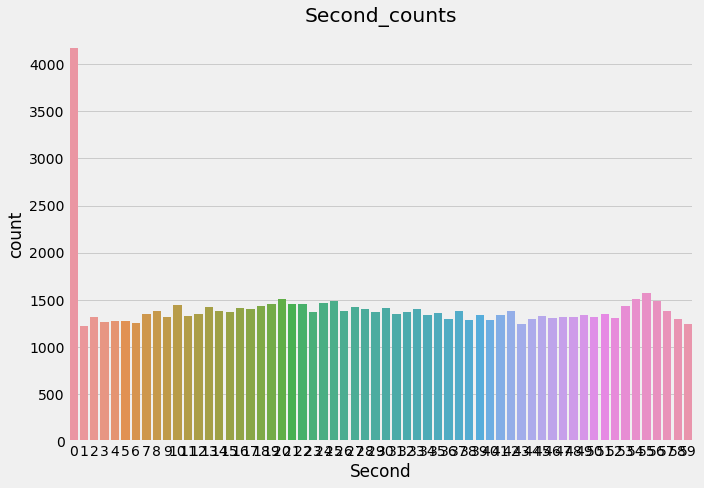

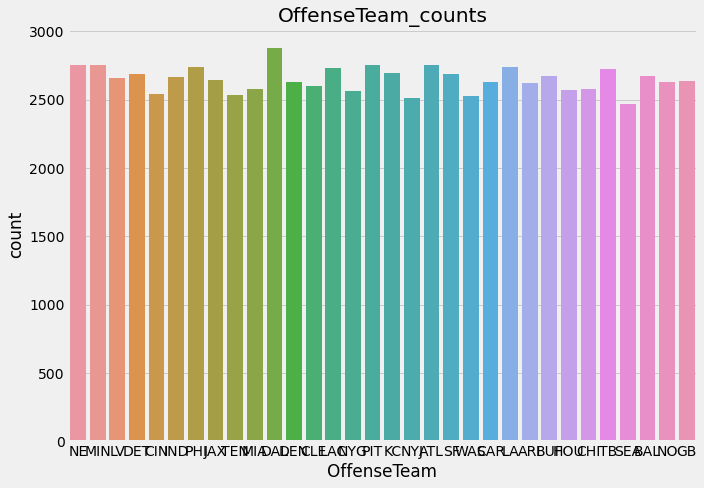

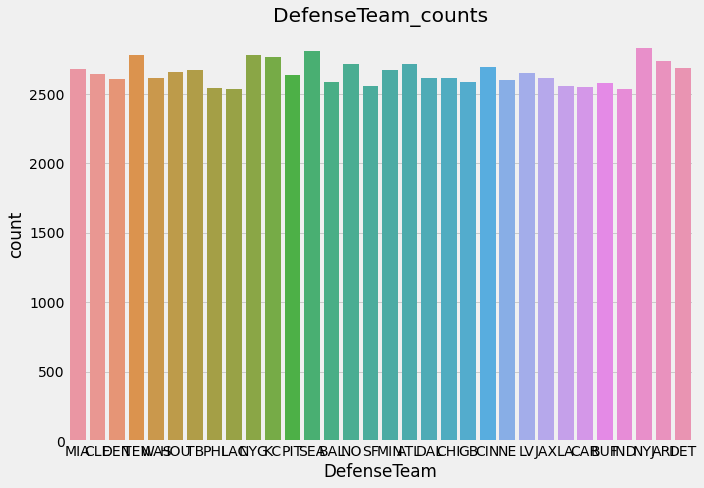

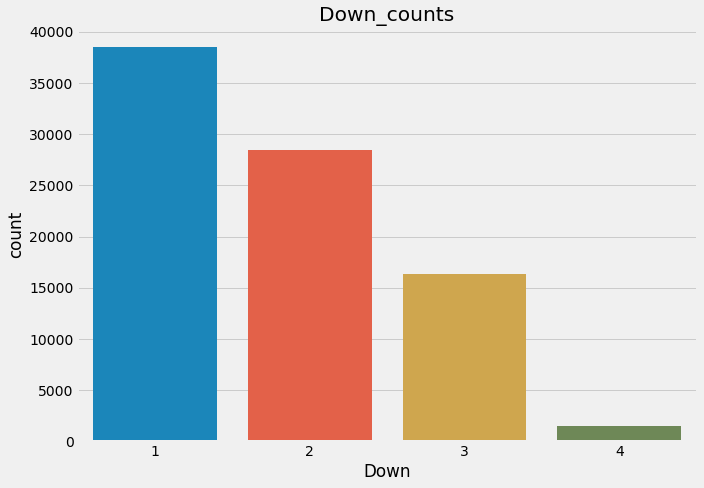

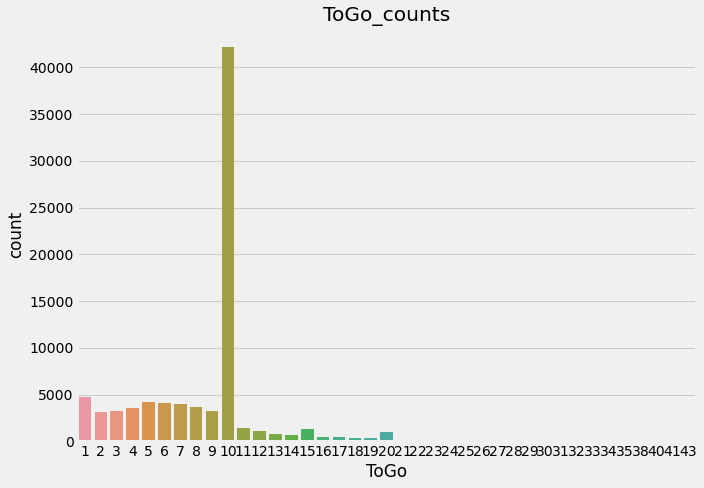

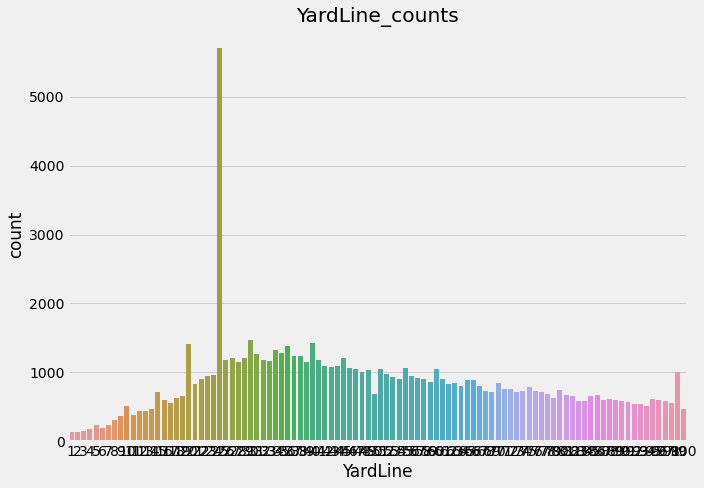

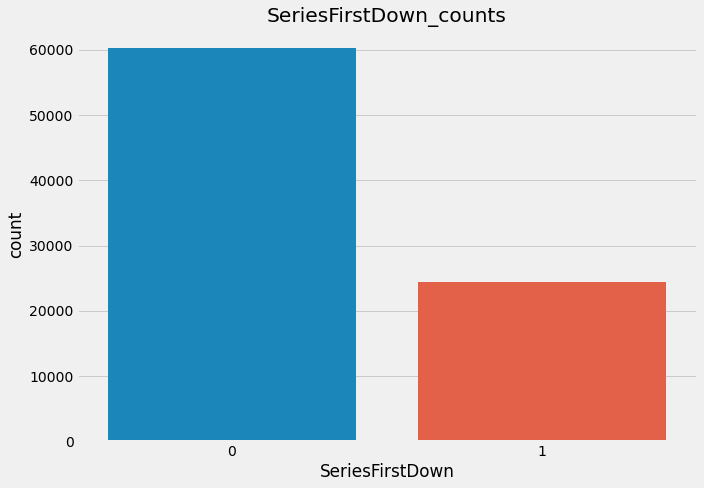

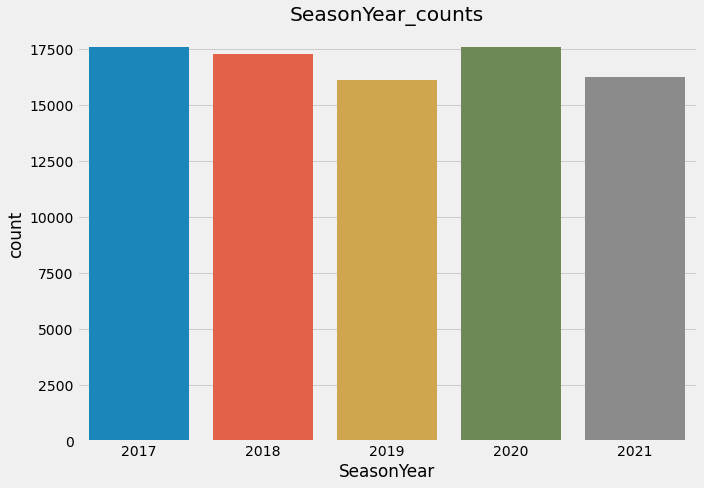

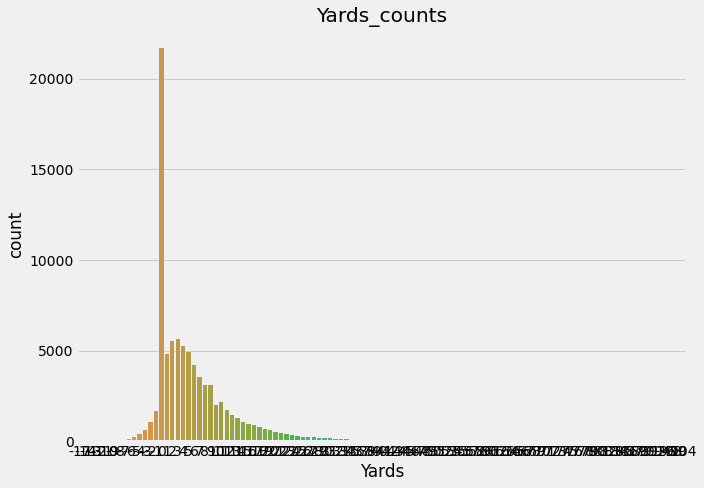

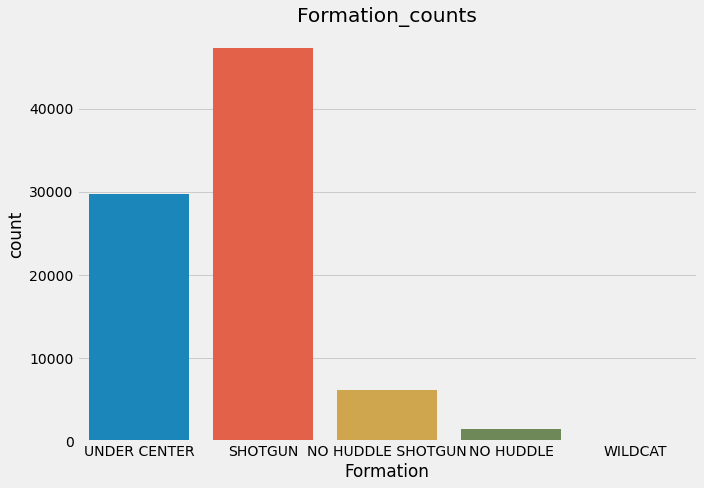

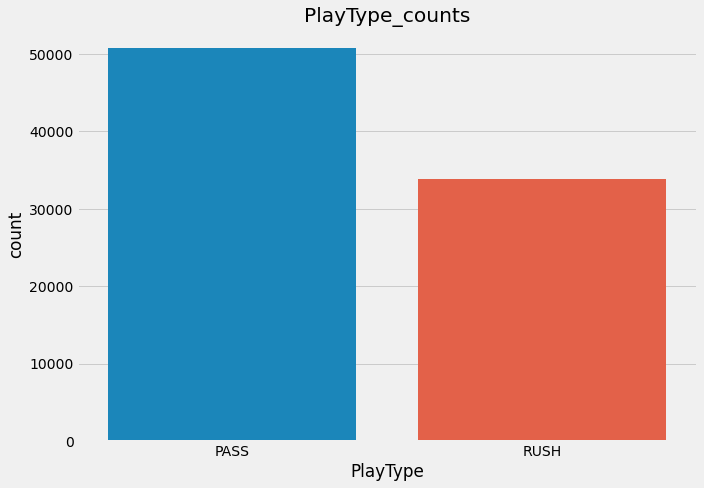

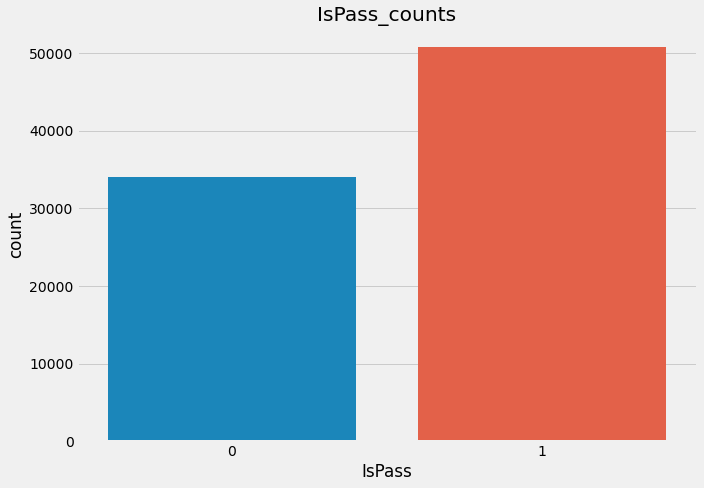

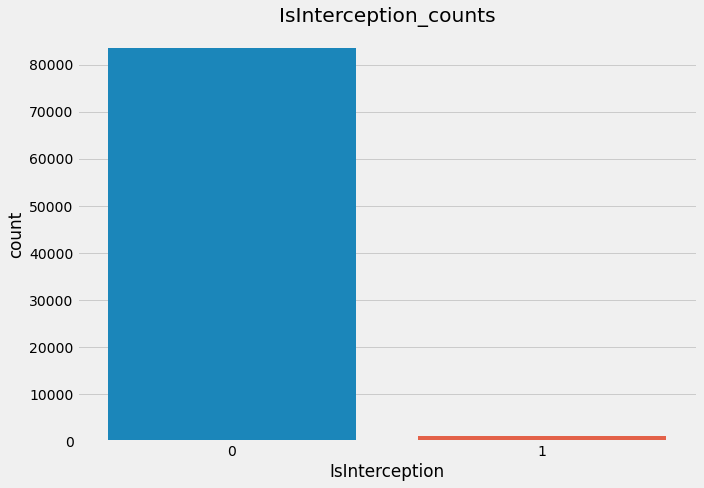

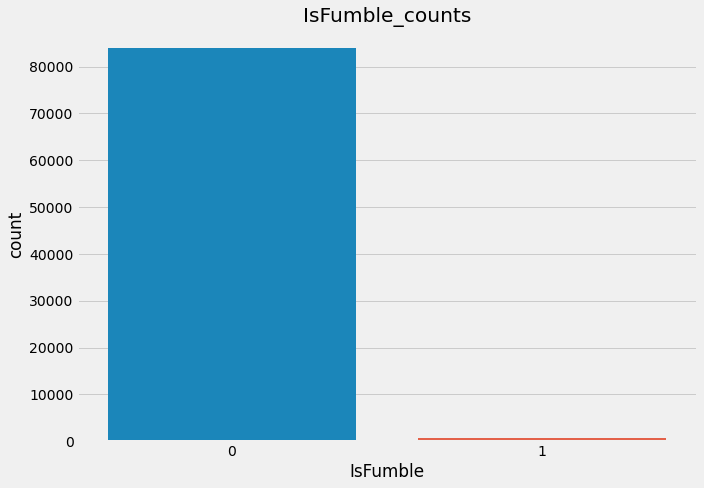

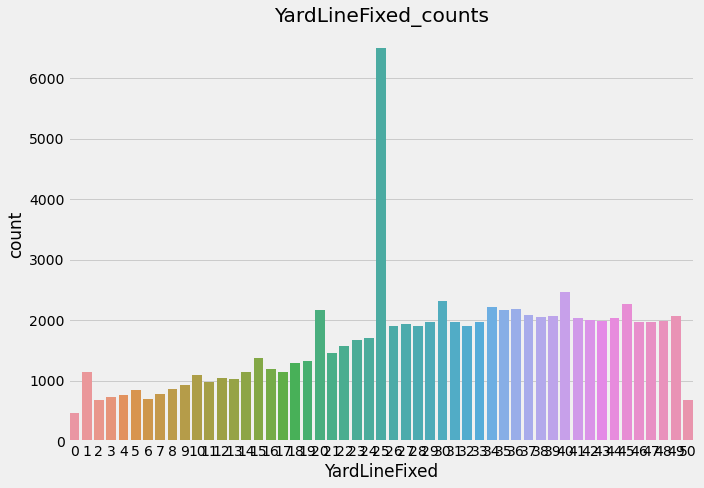

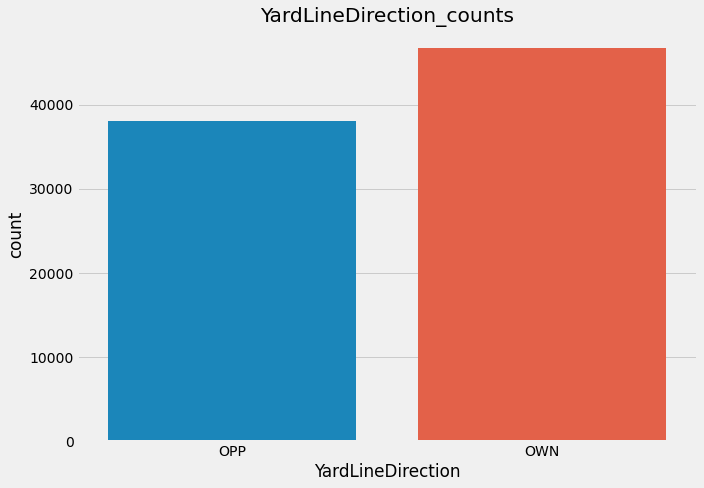

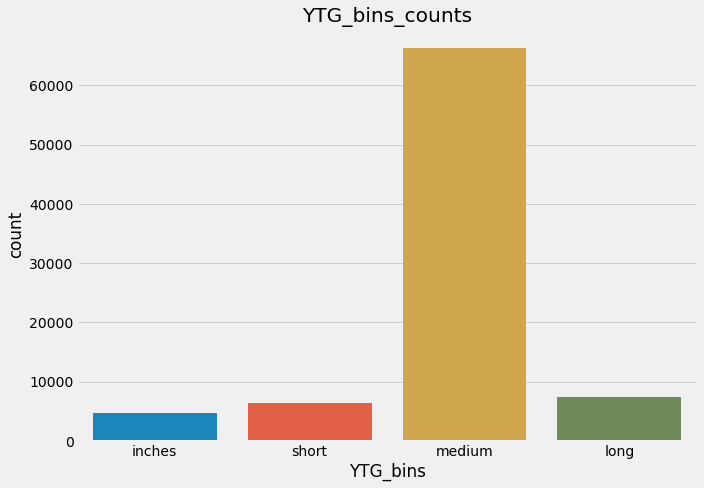

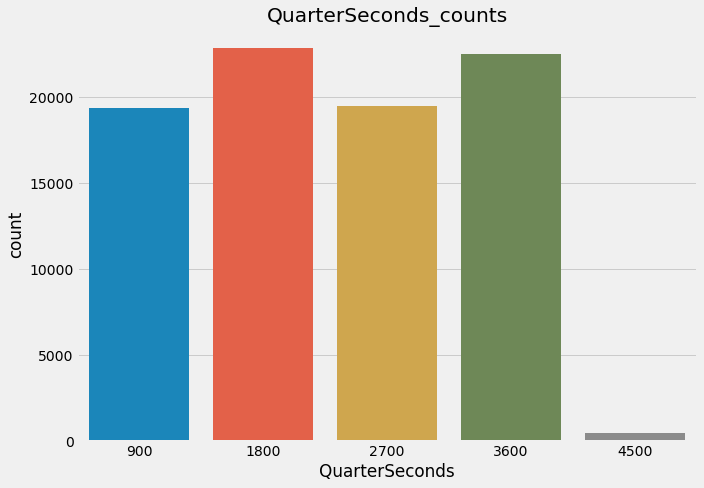

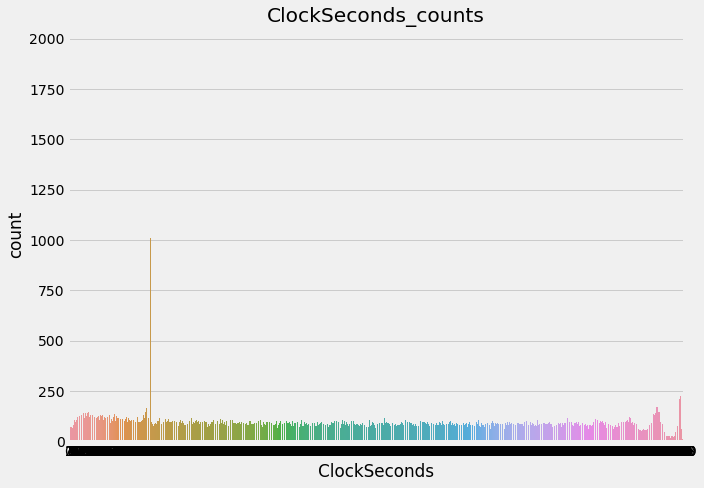

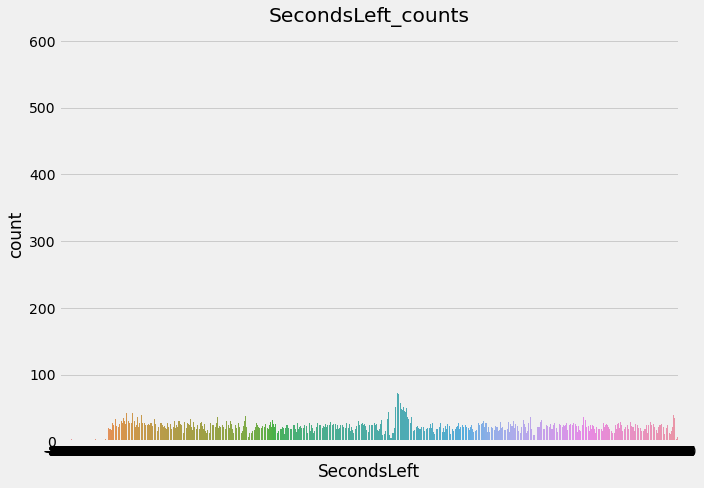

In [18]:
# Take a look at categorical columns
for col in train.columns:
    # Plot a barplot to represent the counts
    sns.countplot(data=train,
                  x=col)
    plt.title(f'{col}_counts')
    plt.tight_layout()
    plt.show()

In [19]:
# Take a look at Pass vs Run counts 
df.PlayType.value_counts(), train.PlayType.value_counts()

(PASS    90804
 RUSH    60399
 Name: PlayType, dtype: int64,
 PASS    50807
 RUSH    33868
 Name: PlayType, dtype: int64)

In [20]:
# Take a look at Pass vs Run yard accumulated
df.groupby('PlayType')['Yards'].sum(), train.groupby('PlayType')['Yards'].sum()

(PlayType
 PASS    671599
 RUSH    263442
 Name: Yards, dtype: int64,
 PlayType
 PASS    374434
 RUSH    148151
 Name: Yards, dtype: int64)

In [21]:
# Take a look at pass AND run cumulated yardage
df.Yards.sum(), train.Yards.sum()

(935041, 522585)

In [22]:
# Take a look at average yardage for Pass vs Rush
df.groupby('PlayType')['Yards'].mean(), train.groupby('PlayType')['Yards'].mean()

(PlayType
 PASS    7.396139
 RUSH    4.361695
 Name: Yards, dtype: float64,
 PlayType
 PASS    7.369733
 RUSH    4.374365
 Name: Yards, dtype: float64)

In [23]:
# Take a look at how many particular downs ther were
df.Down.value_counts(), train.Down.value_counts()

(1    68581
 2    50702
 3    29391
 4     2734
 Name: Down, dtype: int64,
 1    38534
 2    28409
 3    16318
 4     1527
 Name: Down, dtype: int64)

In [24]:
 train.describe().T

,count,mean,std,min,25%,50%,75%,max
Quarter,84788.0,2.550797,1.127846,1.0,2.0,3.0,4.0,5.0
Minute,84788.0,6.760568,4.511823,0.0,3.0,7.0,11.0,15.0
Second,84788.0,28.572463,17.729069,0.0,13.0,28.0,44.0,59.0
Down,84788.0,1.774001,0.817253,1.0,1.0,2.0,2.0,4.0
ToGo,84788.0,8.552897,3.953976,1.0,6.0,10.0,10.0,43.0
YardLine,84788.0,49.177042,24.676419,1.0,28.0,45.0,68.0,100.0
SeriesFirstDown,84788.0,0.288708,0.453165,0.0,0.0,0.0,1.0,1.0
SeasonYear,84788.0,2018.972732,1.416109,2017.0,2018.0,2019.0,2020.0,2021.0
Yards,84788.0,6.163431,8.902841,-17.0,0.0,4.0,9.0,104.0
IsPass,84788.0,0.599224,0.490059,0.0,0.0,1.0,1.0,1.0


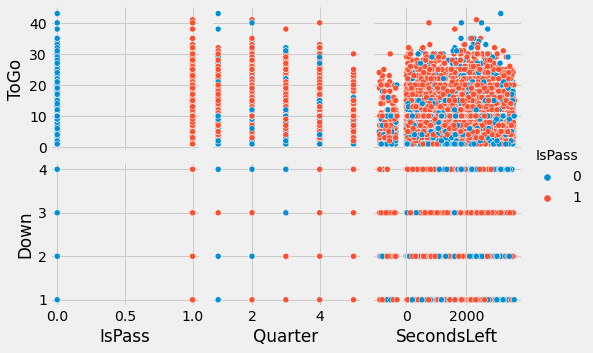

In [25]:
# Pair plot to see if anythinf linearly stands out
sns.pairplot(data = train, hue = 'IsPass', 
             x_vars = ['IsPass', 'Quarter', 'SecondsLeft'],             
             y_vars = ['ToGo', 'Down'])

### Initial Questions:
- Has passing increased over the years?
- Is there a relationship between what down it is and passing the ball?
- Is there a linear relationship between current quarter and passing the ball?
- Has offensive produced yards increased over time?

### Question #1:
##### Has Passing increased over the years?

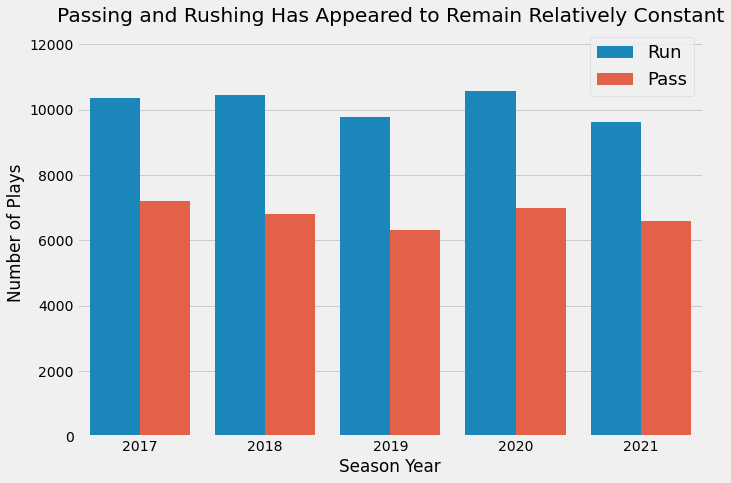

In [26]:
plt.title('Passing and Rushing Has Appeared to Remain Relatively Constant')
sns.countplot(data = train, x= 'SeasonYear', hue = 'PlayType')
plt.xlabel('Season Year')
plt.ylabel('Number of Plays')
plt.ylim(0,12500)
plt.legend(['Run', 'Pass'], prop ={'size':18})
plt.show()

### Answer to Question #1:
While passing has fluctuated over the years of our data, it appears to be somewhat constant around 10,000 plays per season.

### Question #2:
#### Is there a relationship between what down it is and passing the ball?

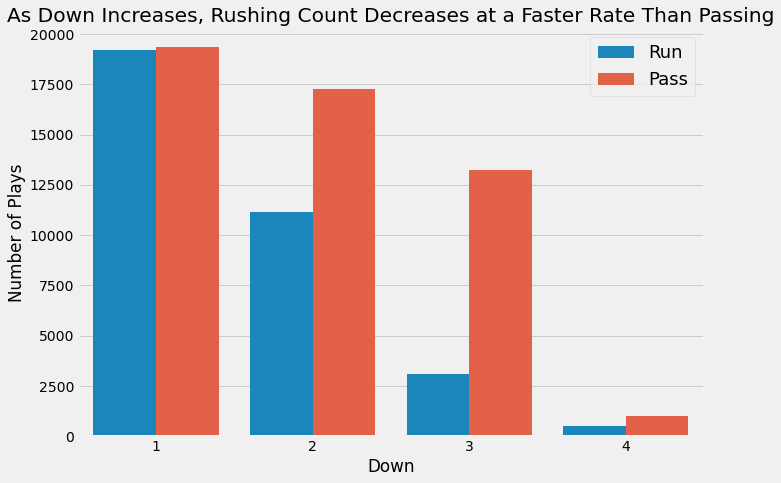

In [27]:
plt.title('As Down Increases, Rushing Count Decreases at a Faster Rate Than Passing')
sns.countplot(data = train, x= 'Down', hue = 'IsPass')
plt.xlabel('Down')
plt.ylabel('Number of Plays')
plt.legend(['Run', 'Pass'], prop ={'size':18})
plt.show()

### Stats Test (Pearson's r):

#### Hypothesis:
 - H0: There is no linear relationship between down and whether it is a pass play.
 - Ha: There is linear relationship between down and whether it is a pass play.

In [28]:
x = train['Down']
y = train['IsPass']
a = 0.05
r, p = stats.pearsonr(x,y)
null_hypothesis = "there is no linear relationship \nbetween down and the play resulting in a pass."
print('=============================================================')
print('r =', r)
print('p =', p)
print('-------------------------------------------------------------')
if p < a:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
print('=============================================================')

r = 0.21698781997451191
p = 0.0
-------------------------------------------------------------
We reject the hypothesis that there is no linear relationship 
between down and the play resulting in a pass.


### Answer to Question #2:
According to our bar chart, there seem to be a linear relationship between what down it is and the probability of the play being a pass. Our statistical testing backs this belief.

### Question #3:
#### Is there a linear relationship between the current quarter and passing the ball?

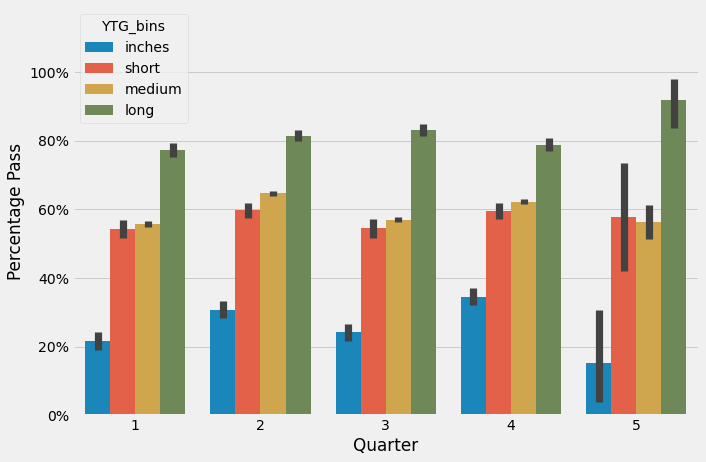

In [29]:
# plt.figure(figsize = (10,8))
# plt.title('As Down Increases, Rushing Count Decreases at a Faster Rate Than Passing')
# plt.plot(data = train, x= 'SecondsLeft', y = 'PlayType')
# plt.xlabel('SecondsLeft')
# plt.ylabel('PlayType')
# plt.legend(['Run', 'Pass'], prop ={'size':18})


ax = sns.barplot(x=train.Quarter, y=train.IsPass, data= train, hue ='YTG_bins')
plt.xlabel('Quarter')
plt.ylabel('Percentage Pass')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.ylim(0,1.19)
plt.show()

Considering that visual isn't very helpful, let's lean on statistical testing with a Chi^2 test.

#### Stats Test (Chi^2):
#### Hypothesis:
 - H0: Pass is independent of the current quarter.
 - Ha: Pass is not independent of the current quarter.

In [30]:
# Set our alpha
alpha = 0.05
# Crosstab Attrition vs Business Travel
observed = pd.crosstab(train.IsPass, train.Quarter)
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "IsPass and Quarter are independent."
print('=================================================================')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')
print('-----------------------------------------------------------------')
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
print('=================================================================')

chi^2 = 377.8400
p     = 1.7047081952091722e-80
-----------------------------------------------------------------
We reject the hypothesis that IsPass and Quarter are independent.


### Answer to Question #3:
While our visual isn't very helpful, we can rely on our Chi^2 test to prove that we can reject the idea that IsPass and the quarter of play are independent of each other.

### Question #4:
#### Has offensive yards increased over time?

In [31]:
# Make an easy data frame that lists the findings in order 
# of Seasons with the highest yardage produced
pd.DataFrame(df.groupby('SeasonYear')['Yards']
             .sum().sort_values(ascending = False))

,Yards
SeasonYear,
2020,195736
2018,194828
2017,186368
2019,180045
2021,178064


### Answer to Question #4:
We can see from our data frame that yardage has not increased over the last 5 seasons on a continual or linear basis. In fact last year resulted in the least amount of yardage produced over the past 5 years.

### Clustering:

#### Scaling the data:

In [32]:
train_scaled, validate_scaled, test_scaled = w.min_max_scaler(train, validate, test)

In [33]:
# Set target variables
target_var = 'IsPass'

#Make copies of train, validate, and test
train_scaled = train_scaled.copy()
validate_scaled = validate_scaled.copy()
test_scaled = test_scaled.copy()

# create X_train by dropping the target variable 
X_train = train_scaled.drop(columns=[target_var])
# create y_train by keeping only the target variable.
y_train = train[[target_var]]

# create X_validate by dropping the target variable 
X_validate = validate_scaled.drop(columns=[target_var])
# create y_validate by keeping only the target variable.
y_validate = validate[[target_var]]

# create X_test by dropping the target variable 
X_test = test_scaled.drop(columns=[target_var])
# create y_test by keeping only the target variable.
y_test = test[[target_var]]

#### Cluster with yards ToGo, and SecondsLeft

In [34]:
# Scale Needed data for cluster
# Exploring one version of clustering 
cluster_vars = ['ToGo', 'SecondsLeft']
cluster_name = 'togo_cluster'

scaler = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])
X_validate_scaled = scaler.transform(X_validate[cluster_vars])
X_test_scaled = scaler.transform(X_test[cluster_vars])

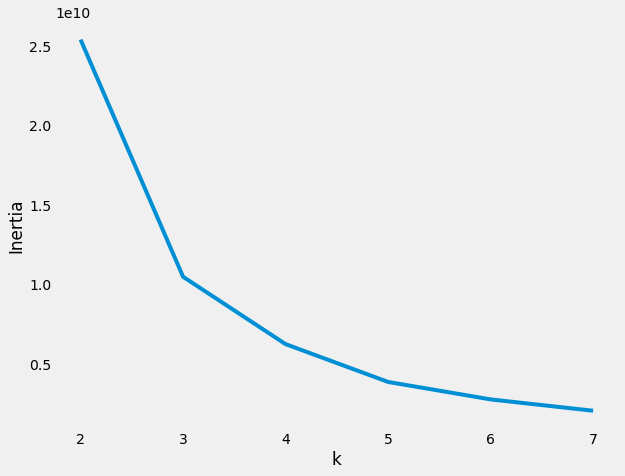

In [35]:
# Use interia function in order to find the best 
# k-value with the elbow method
w.inertia(train, 'ToGo', 'SecondsLeft', 2,8)

In [36]:
# Like our other scikit-learn models, we'll create the instance of the 
# k-means class, then fit it to our data. Once we've done that, 
# we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([2, 2, 1, ..., 2, 2, 0], dtype=int32)

In [37]:
# The numbers output here are the groups that our K-means algorithm 
# predicted each row to be in. Let's go ahead and store the predicted 
# cluster back into our original dataframe.
train['togo_cluster'] = kmeans.predict(X_train_scaled)
train.togo_cluster = train.togo_cluster.astype('category')

validate['togo_cluster'] = kmeans.predict(X_validate_scaled)
validate.togo_cluster = validate.togo_cluster.astype('category')

test['togo_cluster'] = kmeans.predict(X_test_scaled)
test.togo_cluster = test.togo_cluster.astype('category')

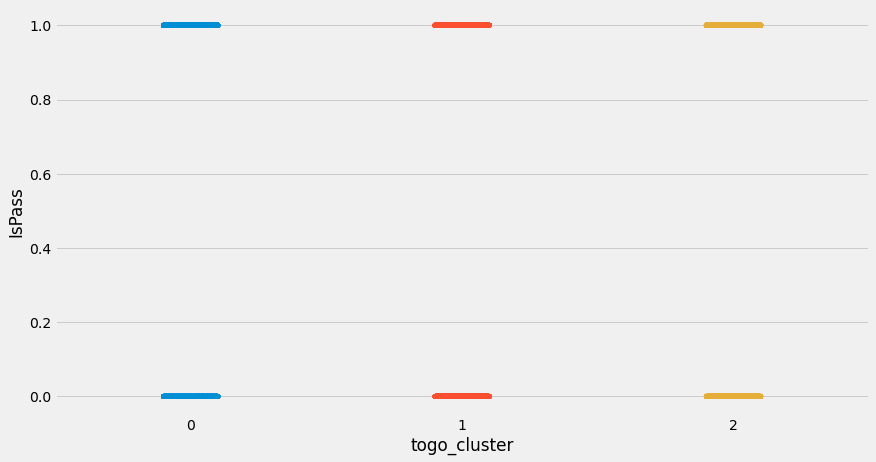

In [38]:
x = train.togo_cluster
y = train.IsPass
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

Text(0.5, 1.0, 'Original Data with Cluster Labels')

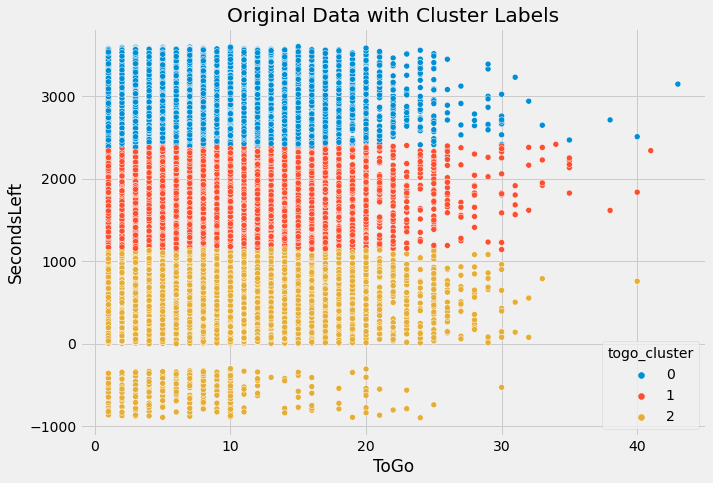

In [39]:
sns.scatterplot(x= 'ToGo', y = 'SecondsLeft', hue='togo_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [40]:
train.groupby('togo_cluster')['ToGo', 'SecondsLeft', 'IsPass'].mean()

,ToGo,SecondsLeft,IsPass
togo_cluster,,,
0,8.501535,2998.126171,0.558214
1,8.622534,1779.612751,0.621336
2,8.526871,523.264194,0.613936


#### Hypothesis:
- H0: IsPass for togo_clusters == IsPass mean.
- Ha: IsPass for togo_clusters != IsPass mean.

In [41]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.togo_cluster==0].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-13.41193937259846, 7.009032496985434e-41)
We fail to reject the Null Hypothesis


In [42]:
alpha = .05
# Create variable names to input into our test
train_error = train[train.togo_cluster==1].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(7.902569959730887, 2.8249875815357716e-15)
We reject the Null Hypothesis


In [43]:
alpha = .05
# Create variable names to input into our test
train_error = train[train.togo_cluster==2].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(5.088798777590274, 3.6263710924795526e-07)
We reject the Null Hypothesis


#### Findings:
 - togo_cluster1 is the only null hypothesis we cannot reject
 - togo_cluster2 includes overtime games where fields are shorter.

#### Cluster with Down, and SecondsLeft

In [44]:
# Scale Needed data for cluster
# Exploring one version of clustering 
cluster_vars = ['Down', 'SecondsLeft']
cluster_name = 'down_cluster'

scaler = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])
X_validate_scaled = scaler.transform(X_validate[cluster_vars])
X_test_scaled = scaler.transform(X_test[cluster_vars])

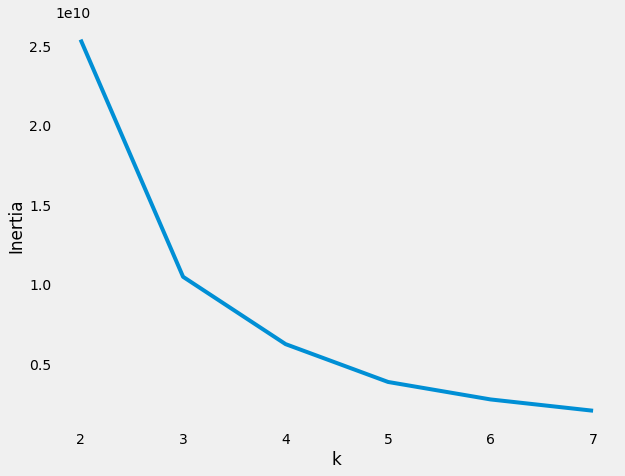

In [45]:
w.inertia(train, 'Down', 'SecondsLeft', 2,8)

In [46]:
# Like our other scikit-learn models, we'll create the instance of the 
# k-means class, then fit it to our data. Once we've done that, 
# we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

In [47]:
# The numbers output here are the groups that our K-means algorithm 
# predicted each row to be in. Let's go ahead and store the predicted 
# cluster back into our original dataframe.
train['down_cluster'] = kmeans.predict(X_train_scaled)
train.down_cluster = train.down_cluster.astype('category')

validate['down_cluster'] = kmeans.predict(X_validate_scaled)
validate.down_cluster = validate.down_cluster.astype('category')

test['down_cluster'] = kmeans.predict(X_test_scaled)
test.down_cluster = test.down_cluster.astype('category')

Text(0.5, 1.0, 'Original Data with Cluster Labels')

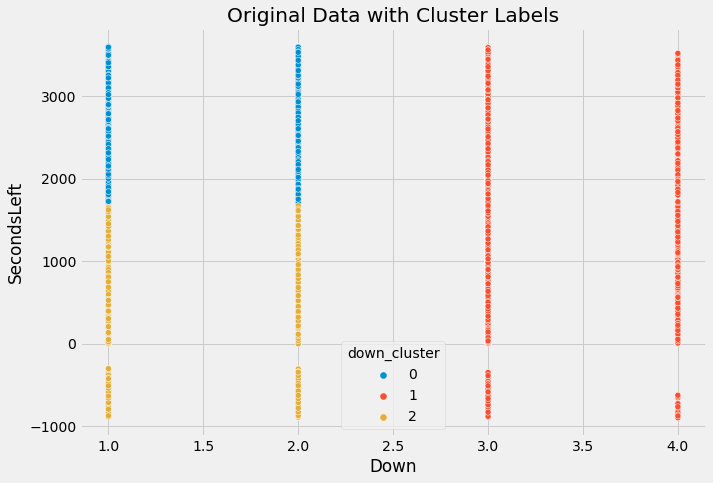

In [48]:
sns.scatterplot(x= 'Down', y = 'SecondsLeft', hue='down_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [49]:
train.groupby('down_cluster')['Down', 'SecondsLeft', 'IsPass'].mean()

,Down,SecondsLeft,IsPass
down_cluster,,,
0,1.421422,2595.222726,0.543303
1,3.085570,1663.660353,0.796470
2,1.427761,799.517904,0.550473


#### Hypothesis:
- H0: IsPass for down_clusters == IsPass mean.
- Ha: IsPass for down_clusters != IsPass mean.

In [50]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.down_cluster==0].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-21.225515557610603, 2.2827931001543897e-99)
We fail to reject the Null Hypothesis


In [51]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.down_cluster==1].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(65.44165913333467, 0.0)
We reject the Null Hypothesis


In [52]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.down_cluster==2].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-17.309087223156972, 8.249955916179541e-67)
We fail to reject the Null Hypothesis


#### Findings:
 - down_cluster1 was found on 3rd and 4th downs.
 - down_cluster2 was found to be in earlier downs with less time left in the game.

#### Cluster with Down and yards ToGo

In [53]:
# Scale Needed data for cluster
# Exploring one version of clustering 
cluster_vars = ['Down', 'ToGo']
cluster_name = 'dandd_cluster'

scaler = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])
X_validate_scaled = scaler.transform(X_validate[cluster_vars])
X_test_scaled = scaler.transform(X_test[cluster_vars])

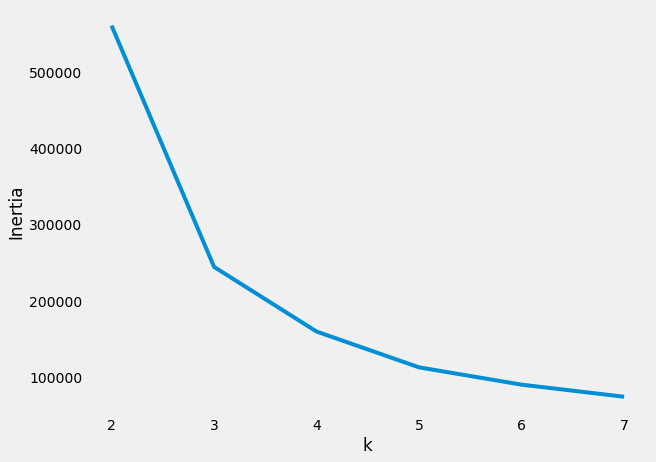

In [54]:
w.inertia(train, 'Down', 'ToGo', 2,8)

In [55]:
# Like our other scikit-learn models, we'll create the instance of the 
# k-means class, then fit it to our data. Once we've done that, 
# we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [56]:
# The numbers output here are the groups that our K-means algorithm 
# predicted each row to be in. Let's go ahead and store the predicted 
# cluster back into our original dataframe.
train['dandd_cluster'] = kmeans.predict(X_train_scaled)
train.dandd_cluster = train.dandd_cluster.astype('category')

validate['dandd_cluster'] = kmeans.predict(X_validate_scaled)
validate.dandd_cluster = validate.dandd_cluster.astype('category')

test['dandd_cluster'] = kmeans.predict(X_test_scaled)
test.dandd_cluster = test.dandd_cluster.astype('category')

Text(0.5, 1.0, 'Original Data with Cluster Labels')

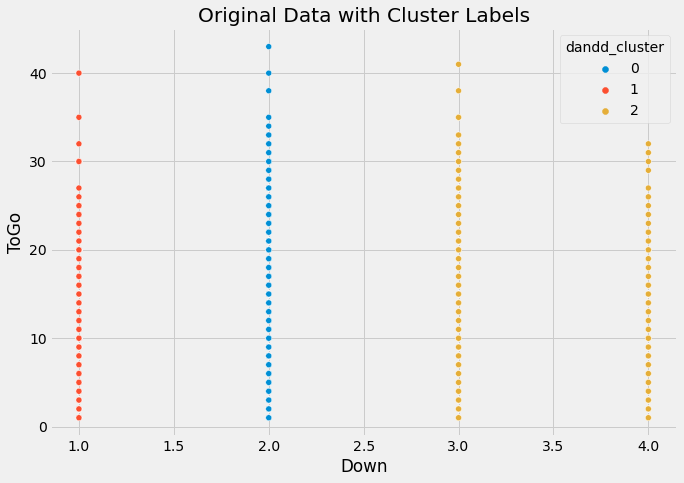

In [57]:
sns.scatterplot(x= 'Down', y = 'ToGo', hue='dandd_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [58]:
train.groupby('dandd_cluster')['Down', 'ToGo', 'IsPass'].mean()

,Down,ToGo,IsPass
dandd_cluster,,,
0,2.00000,7.790982,0.607800
1,1.00000,9.948539,0.501557
2,3.08557,6.752143,0.796470


#### Hypothesis:
- H0: IsPass for dandd_clusters == IsPass mean.
- Ha: IsPass for dandd_clusters != IsPass mean.

In [59]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.dandd_cluster==0].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(2.9606780959347696, 0.003072162151544558)
We reject the Null Hypothesis


In [60]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.dandd_cluster==1].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(-38.34385982816544, 0.0)
We fail to reject the Null Hypothesis


In [61]:
# Set the alpha for the test
alpha = .05
# Create variable names to input into our test
train_error = train[train.dandd_cluster==2].IsPass
overall_mean = train.IsPass.mean()
# Run the test to retrieve t and p
t,p = stats.ttest_1samp(train_error, overall_mean)
# Run print statements depending on the tests outcome
print(f'{t,p}')
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

(65.44165913333467, 0.0)
We reject the Null Hypothesis


#### Findings:
 - We fail to reject dandd_cluster1's H0.
 - It seems ToGo yardage is a driver.

### Modeling
We start by setting our baseline to the most common outcome, or the mode...

In [62]:
train.IsPass.value_counts()

1    50807
0    33981
Name: IsPass, dtype: int64

In [63]:
train['baseline'] = 1
baseline_accuracy = (train.baseline == train.IsPass).mean()
baseline_accuracy

0.5992239467849224

In [64]:
baseline_accuracy = (train.baseline == train.IsPass).mean()
baseline_accuracy


0.5992239467849224

In [65]:
#Define features used for the model
x_cols =['togo_cluster', 'Down', 'YardLine']

In [66]:
# Set x_ and y_train
x_train = train[x_cols]
y_train = train[['IsPass']]

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

x_train = train[x_cols]
y_train = train[['IsPass']]

x_validate = validate[x_cols]
y_validate = validate[['IsPass']]

x_test = test[x_cols]
y_test = test[['IsPass']]

Verify it worked...

In [67]:
y_train.head()

,IsPass
42319,1
4651,0
2393,1
39733,1
19390,1


In [68]:
x_train.head()

,togo_cluster,Down,YardLine
42319,2,2,97
4651,2,2,60
2393,1,2,23
39733,2,1,27
19390,2,3,46


#### Logistic Regression:

In [69]:
logit = LogisticRegression(random_state=123)
logit.fit(x_train, y_train)
weights = logit.coef_.flatten()
pd.DataFrame(weights, x_cols).reset_index().rename(columns={'index': 'x_cols', 0: 'weight'})


,x_cols,weight
0,togo_cluster,0.109097
1,Down,0.589426
2,YardLine,-0.004533


In [70]:
logit = LogisticRegression(C=1, random_state=123)
logit.fit(x_train, y_train)
# Accuracy on train for  KNN:
print(f'Accuracy of Logistic Regression on the training set is {(logit.score(x_train, y_train)):.2%}')
# Accurcy on validate for KNN:
print(f'Accuracy of Logistic Regression on the validate set is {(logit.score(x_validate, y_validate)):.2%}')

Accuracy of Logistic Regression on the training set is 60.97%
Accuracy of Logistic Regression on the validate set is 61.30%


#### Decision Tree:

In [71]:
# Create the model and set Tree max depth
tree = DecisionTreeClassifier(max_depth = 6)
# Fit the model
tree.fit(x_train,y_train.IsPass)


DecisionTreeClassifier(max_depth=6)

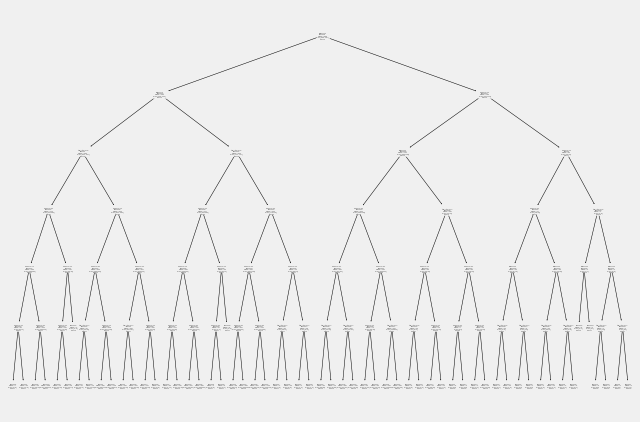

In [72]:
# Show Decision Tree
plot_tree(tree, 
          feature_names=x_train.columns, 
          class_names=y_train.IsPass.astype(str).values)
plt.show()

In [73]:
y_pred = tree.predict(x_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.555668,0.307849,0.396197,33981.000000
1,0.643431,0.835357,0.726940,50807.000000
accuracy,0.623944,0.623944,0.623944,0.623944
macro avg,0.599549,0.571603,0.561568,84788.000000
weighted avg,0.608258,0.623944,0.594386,84788.000000


In [74]:
# Evaluate the model
# Accuracy on train for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the training set is {(tree.score(x_train, y_train)):.2%}')
# Accurcy on validate for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the validate set is {(tree.score(x_validate, y_validate)):.2%}')

Accuracy of Decision Tree Classifier on the training set is 62.39%
Accuracy of Decision Tree Classifier on the validate set is 62.49%


#### Random Forest:


In [75]:
# Evaluate Random Forest models on train & validate set by looping through different values for max_depth and min_samples_leaf hyperparameters
# create empty list for which to append metrics from each loop
scores = []
# set value for range
max_value = range(1,26)
# create loop for range 1-25
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    rf = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    rf = rf.fit(x_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = rf.score(x_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = rf.score(x_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy

In [76]:
# Build the model with max depth of 10
rf = RandomForestClassifier(max_depth=16,min_samples_leaf=16,random_state=1349)
# Fit the model
rf.fit(x_train, y_train)
# Accuracy on train for the Random Forest:
print(f'Accuracy of Random Forest on the training set is {(rf.score(x_train, y_train)):.2%}')
# Accurcy on validate for the Random Forest:
print(f'Accuracy of Random Forest on the validate set is {(rf.score(x_validate, y_validate)):.2%}')

Accuracy of Random Forest on the training set is 63.03%
Accuracy of Random Forest on the validate set is 62.05%


#### K's Nearest Neighbors:

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
print('Accuracy of KNN on training set: {:.2%}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN on training set: 59.08%


In [78]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.39      0.43     33981
           1       0.64      0.73      0.68     50807

    accuracy                           0.59     84788
   macro avg       0.56      0.56      0.56     84788
weighted avg       0.58      0.59      0.58     84788



In [79]:
x_val_train = validate[x_cols]
y_val_train = validate[['IsPass']]
x_val_train.head()

,togo_cluster,Down,YardLine
14162,0,2,92
22540,2,2,31
28367,0,1,25
40017,1,1,25
10685,1,1,52


In [80]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model
knn.fit(x_train,y_train)
# Accuracy on train for  KNN:
print(f'Accuracy of KNN on the training set is {(knn.score(x_train, y_train)):.2%}')
# Accuracy on validate for KNN:
print(f'Accuracy of KNN on the validate set is {(knn.score(x_validate, y_validate)):.2%}')

Accuracy of KNN on the training set is 59.08%
Accuracy of KNN on the validate set is 58.60%


In [81]:
print('==================================================================')
# Accuracy on train for  KNN:
print(f'Accuracy of Logistic Regression on the training set is {(logit.score(x_train, y_train)):.2%}')
# Accurcy on validate for KNN:
print(f'Accuracy of Logistic Regression on the validate set is {(logit.score(x_validate, y_validate)):.2%}')

print('------------------------------------------------------------------')
# Accuracy on train for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the training set is {(tree.score(x_train, y_train)):.2%}')
# Accuracy on validate for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the validate set is {(tree.score(x_validate, y_validate)):.2%}')
print('------------------------------------------------------------------')
# Accuracy on train for the Random Forest:
print(f'Accuracy of Random Forest on the training set is {(rf.score(x_train, y_train)):.2%}')
# Accurcy on validate for the Random Forest:
print(f'Accuracy of Random Forest on the validate set is {(rf.score(x_validate, y_validate)):.2%}')
print('------------------------------------------------------------------')
# Accuracy on train for  KNN:
print(f'Accuracy of KNN on the training set is {(knn.score(x_train, y_train)):.2%}')
# Accurcy on validate for KNN:
print(f'Accuracy of KNN on the validate set is {(knn.score(x_validate, y_validate)):.2%}')
print('==================================================================')

Accuracy of Logistic Regression on the training set is 60.97%
Accuracy of Logistic Regression on the validate set is 61.30%
------------------------------------------------------------------
Accuracy of Decision Tree Classifier on the training set is 62.39%
Accuracy of Decision Tree Classifier on the validate set is 62.49%
------------------------------------------------------------------
Accuracy of Random Forest on the training set is 63.03%
Accuracy of Random Forest on the validate set is 62.05%
------------------------------------------------------------------
Accuracy of KNN on the training set is 59.08%
Accuracy of KNN on the validate set is 58.60%


### Run Best Model (Decision Tree) on Test:

In [82]:
# Create the model and set Tree max depth
tree = DecisionTreeClassifier(max_depth = 6)
# Fit the model
tree.fit(x_test,y_test.IsPass)

DecisionTreeClassifier(max_depth=6)

In [83]:
y_train.IsPass.unique()

array([1, 0])

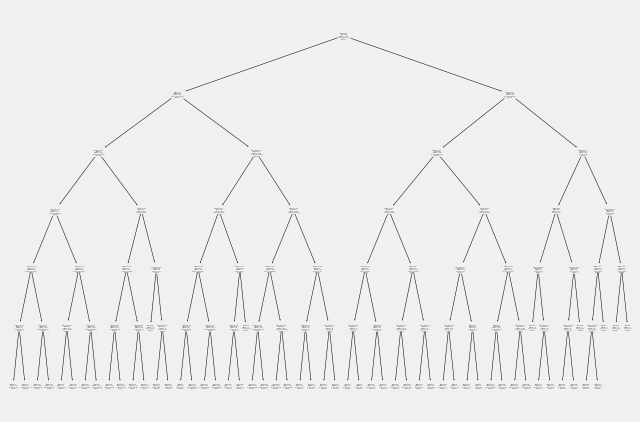

In [84]:
# Show Decision Tree
plot_tree(tree, 
          feature_names=x_train.columns, 
          class_names=y_train.IsPass.astype(str).values)
plt.show()

In [85]:
y_pred = tree.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T


,precision,recall,f1-score,support
0,0.556107,0.369592,0.444059,12135.000000
1,0.655669,0.802722,0.721782,18147.000000
accuracy,0.629153,0.629153,0.629153,0.629153
macro avg,0.605888,0.586157,0.582921,30282.000000
weighted avg,0.615771,0.629153,0.610489,30282.000000


In [87]:
#Create the model
tree = DecisionTreeClassifier(max_depth=6, random_state=123)
# Fit the model
tree.fit(x_test, y_test)
# Evaluate the model
# Accuracy on train for the Decision Tree:
print(f'Baseline Accuracy of Decision Tree Classifier is {(baseline_accuracy):.2%}')
# Accurcy on validate for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the test set is {(tree.score(x_test, y_test)):.2%}')

Baseline Accuracy of Decision Tree Classifier is 59.92%
Accuracy of Decision Tree Classifier on the test set is 62.92%


### Conclusion:
The goals of this project were to identify drivers of pass plays in order to predict whether or not a play would result in a pass or run for NFL offenses. Key drivers found were the following:

    - Down
    - Yardline
    - togo_cluster (Yards to go along with seconds left in the game)

Using these drivers to help our model resulted in an increase of 3% over the baseline. 

#### Recommendation(s):
An increase of 2.63% isn't impactful enough to push the model forward to help with predictions in future or real time scenarios. The model must be further refined.

#### Next Steps:
With more time, I would like to:

    - Work on more feature engineering and explore more relationships of categories to passing and/or running the ball.

    - Explore other datasets to find and create features that will help refine our current model or result in the creation of a new model.
    
    - Look into focusing on plays that happened on specific down and by specific teams.